In [2]:
# Cell 1: imports & paths

import os
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

# We'll use matplotlib-venn for the Venn diagram
try:
    from matplotlib_venn import venn2
except ImportError:
    print("matplotlib-venn not found. Run this in a cell:\n\n%pip install matplotlib-venn")

# Project root assumed one level up from notebooks/
PROJECT_ROOT = Path("..").resolve()
DATA_DIR = PROJECT_ROOT / "data"

print("Project root:", PROJECT_ROOT)
print("Data dir:", DATA_DIR)


Project root: C:\Users\Kiera\Liked_Songs_Analysis
Data dir: C:\Users\Kiera\Liked_Songs_Analysis\data


In [3]:
# Cell 2: load liked songs (from cache if possible)

import sys
sys.path.append(str(PROJECT_ROOT))  # so `src` can be imported

from src.spotify_auth import get_spotify_client
from src.liked_songs import fetch_all_liked_tracks, flatten_liked_tracks

LIKED_CACHE_CSV = DATA_DIR / "liked_songs_flat.csv"

if LIKED_CACHE_CSV.exists():
    print(f"Loading liked songs from cache: {LIKED_CACHE_CSV}")
    liked_df = pd.read_csv(LIKED_CACHE_CSV, parse_dates=["added_at_datetime", "album_release_datetime"])
else:
    print("No cache found → fetching from Spotify API...")
    sp = get_spotify_client(scopes="user-library-read")
    raw_items = fetch_all_liked_tracks(sp, limit=50, max_tracks=None, verbose=True)
    flat_items = flatten_liked_tracks(raw_items)
    liked_df = pd.DataFrame(flat_items)
    
    os.makedirs(DATA_DIR, exist_ok=True)
    liked_df.to_csv(LIKED_CACHE_CSV, index=False)
    print(f"Saved liked songs to {LIKED_CACHE_CSV}")

print("liked_df shape:", liked_df.shape)
liked_df.head()


No cache found → fetching from Spotify API...
Fetched 50 tracks so far...
Fetched 100 tracks so far...
Fetched 150 tracks so far...
Fetched 200 tracks so far...
Fetched 250 tracks so far...
Fetched 300 tracks so far...
Fetched 350 tracks so far...
Fetched 400 tracks so far...
Fetched 450 tracks so far...
Fetched 500 tracks so far...
Fetched 550 tracks so far...
Fetched 600 tracks so far...
Fetched 650 tracks so far...
Fetched 700 tracks so far...
Fetched 750 tracks so far...
Fetched 800 tracks so far...
Fetched 850 tracks so far...
Fetched 900 tracks so far...
Fetched 950 tracks so far...
Fetched 1000 tracks so far...
Fetched 1050 tracks so far...
Fetched 1100 tracks so far...
Fetched 1150 tracks so far...
Fetched 1200 tracks so far...
Fetched 1250 tracks so far...
Fetched 1300 tracks so far...
Fetched 1350 tracks so far...
Fetched 1400 tracks so far...
Fetched 1450 tracks so far...
Fetched 1500 tracks so far...
Fetched 1550 tracks so far...
Fetched 1600 tracks so far...
Fetched 1650 t

,added_at,added_at_datetime,track_id,track_name,track_popularity,explicit,duration_ms,duration_min,track_number,disc_number,...,album_release_datetime,album_total_tracks,artist_names,artist_ids,primary_artist_name,primary_artist_id,is_local,preview_url,spotify_url,uri
0,2025-11-14T13:32:33Z,2025-11-14 13:32:33+00:00,1RM4jcne1iJXnxX1vuGJC0,Entry Four,70,True,33339,0.555650,4,1,...,2024-11-16,6,[Jaydes Archive],[2jBYI7CXIWKtZox3EBMCCs],Jaydes Archive,2jBYI7CXIWKtZox3EBMCCs,False,None,https://open.spotify.com/track/1RM4jcne1iJXnxX...,spotify:track:1RM4jcne1iJXnxX1vuGJC0
1,2025-11-13T23:30:06Z,2025-11-13 23:30:06+00:00,4gmmRb6bZJffOOiww1JGTO,No Heart,67,True,235040,3.917333,2,1,...,2016-07-15,9,"[21 Savage, Metro Boomin]","[1URnnhqYAYcrqrcwql10ft, 0iEtIxbK0KxaSlF7G42ZOp]",21 Savage,1URnnhqYAYcrqrcwql10ft,False,None,https://open.spotify.com/track/4gmmRb6bZJffOOi...,spotify:track:4gmmRb6bZJffOOiww1JGTO
2,2025-11-13T23:23:52Z,2025-11-13 23:23:52+00:00,7DTlsMOQjGysXHpwwpHuPl,Lifestyle,71,True,269693,4.494883,1,1,...,2014-06-05,1,"[Rich Gang, Young Thug, Rich Homie Quan]","[5pU9lKGn9IUnVvOCONrcIS, 50co4Is1HCEo8bhOyUWKp...",Rich Gang,5pU9lKGn9IUnVvOCONrcIS,False,None,https://open.spotify.com/track/7DTlsMOQjGysXHp...,spotify:track:7DTlsMOQjGysXHpwwpHuPl
3,2025-11-13T23:23:06Z,2025-11-13 23:23:06+00:00,6pcywuOeGGWeOQzdUyti6k,Glock In My Lap,76,True,193591,3.226517,3,1,...,2020-10-02,15,"[21 Savage, Metro Boomin]","[1URnnhqYAYcrqrcwql10ft, 0iEtIxbK0KxaSlF7G42ZOp]",21 Savage,1URnnhqYAYcrqrcwql10ft,False,None,https://open.spotify.com/track/6pcywuOeGGWeOQz...,spotify:track:6pcywuOeGGWeOQzdUyti6k
4,2025-11-09T19:42:07Z,2025-11-09 19:42:07+00:00,53iuhJlwXhSER5J2IYYv1W,The Fate of Ophelia,100,False,226073,3.767883,1,1,...,2025-10-03,12,[Taylor Swift],[06HL4z0CvFAxyc27GXpf02],Taylor Swift,06HL4z0CvFAxyc27GXpf02,False,None,https://open.spotify.com/track/53iuhJlwXhSER5J...,spotify:track:53iuhJlwXhSER5J2IYYv1W


In [4]:
# Cell 3: load tracks_features.csv

tracks_features_path = DATA_DIR / "tracks_features.csv"
if not tracks_features_path.exists():
    raise FileNotFoundError(f"Could not find {tracks_features_path}")

tracks_df = pd.read_csv(tracks_features_path)

print("tracks_df shape:", tracks_df.shape)
print(tracks_df.columns.tolist())

# Ensure 'id' looks like Spotify track IDs
print("\nSample IDs:")
print(tracks_df["id"].astype(str).head())


tracks_df shape: (1204025, 24)
['id', 'name', 'album', 'album_id', 'artists', 'artist_ids', 'track_number', 'disc_number', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'year', 'release_date']

Sample IDs:
0    7lmeHLHBe4nmXzuXc0HDjk
1    1wsRitfRRtWyEapl0q22o8
2    1hR0fIFK2qRG3f3RF70pb7
3    2lbASgTSoDO7MTuLAXlTW0
4    1MQTmpYOZ6fcMQc56Hdo7T
Name: id, dtype: object


In [5]:
# Cell 4: prepare unique ID sets for comparison

# Drop rows without IDs
liked_ids = (
    liked_df
    .dropna(subset=["track_id"])
    .assign(track_id=lambda d: d["track_id"].astype(str))
)

features_ids = (
    tracks_df
    .dropna(subset=["id"])
    .assign(id=lambda d: d["id"].astype(str))
)

liked_unique_ids = set(liked_ids["track_id"].unique())
features_unique_ids = set(features_ids["id"].unique())

intersection_ids = liked_unique_ids & features_unique_ids

print(f"Unique liked songs (by track_id): {len(liked_unique_ids):,}")
print(f"Unique feature tracks (by id):   {len(features_unique_ids):,}")
print(f"Overlap (exact same ID):         {len(intersection_ids):,}")

# Optional: peek at some overlapping tracks
if intersection_ids:
    overlap_sample = (
        liked_df[liked_df["track_id"].isin(list(intersection_ids)[:10])]
        [["track_name", "primary_artist_name", "track_id"]]
        .drop_duplicates()
    )
    display(overlap_sample)


Unique liked songs (by track_id): 2,573
Unique feature tracks (by id):   1,204,025
Overlap (exact same ID):         396


,track_name,primary_artist_name,track_id
129,Pocketful of Sunshine,Natasha Bedingfield,1uigwk5hNV84zRd5YQQRTk
893,Tongue Tied,GROUPLOVE,0GO8y8jQk1PkHzS31d699N
1544,Bad Day,Daniel Powter,0mUyMawtxj1CJ76kn9gIZK
1903,Cold as Ice,Foreigner,1ai4tCk7VbSvrWM0RAyhi2
1930,Silence,Marshmello,7vGuf3Y35N4wmASOKLUVVU
1993,Crazy In Love (feat. JAY-Z),Beyoncé,5IVuqXILoxVWvWEPm82Jxr
2043,Represent,Nas,6DPrhGVJ1WTZvM9fKptnGe
2064,Heart Skips a Beat (feat. Rizzle Kicks),Olly Murs,1f8UCzB3RqIgNkW7QIiIeP
2374,SICKO MODE,Travis Scott,2xLMifQCjDGFmkHkpNLD9h
2533,High Hopes,Panic! At The Disco,1rqqCSm0Qe4I9rUvWncaom


Liked only:   2177
Features only:1203629
Overlap:      396


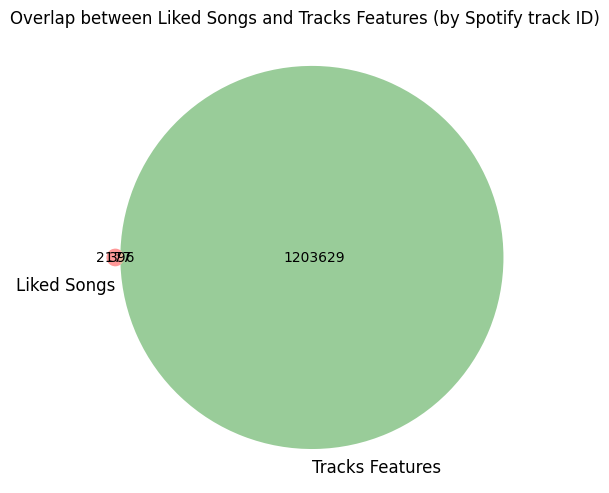

In [6]:
# Cell 5: Venn diagram of liked songs vs features dataset

# Ensure matplotlib-venn is available
from matplotlib_venn import venn2


n_liked = len(liked_unique_ids)
n_features = len(features_unique_ids)
n_overlap = len(intersection_ids)

print(f"Liked only:   {n_liked - n_overlap}")
print(f"Features only:{n_features - n_overlap}")
print(f"Overlap:      {n_overlap}")

plt.figure(figsize=(6, 6))
venn2(
    subsets=(n_liked - n_overlap, n_features - n_overlap, n_overlap),
    set_labels=("Liked Songs", "Tracks Features")
)
plt.title("Overlap between Liked Songs and Tracks Features (by Spotify track ID)")
plt.show()
